In [1031]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

/Users/sofiadonnecke/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


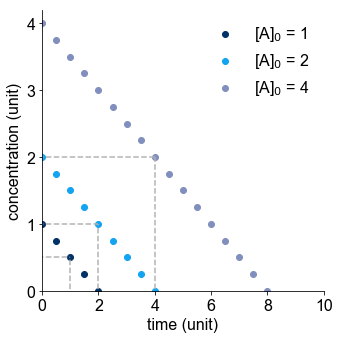

In [1033]:
#zero order
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

k = .5
start = [1, 2, 4]
t = np.arange(0,10,0.5)
legends = ["[A]$_0$ = 1","[A]$_0$ = 2","[A]$_0$ = 4"]
palletteA = ["#003267","#12a4f1","#808fbd"]
palletteB = ["#e5de44","#ef810e","#a73232"]
palletteC = palletteA + palletteB
plt.figure(figsize= (5,5))
for i in range(len(start)):
    y = start[i] - k*t
    plt.scatter(t, y, label = legends[i], marker='o', color = palletteA[i])
    plt.hlines(0.5*start[i], -1, (start[i]-(0.5*start[i]))/k, linestyle = '--', color='#b2b2b2')
    plt.vlines((start[i]-(0.5*start[i]))/k, -.1, 0.5*start[i], linestyle = '--', color='#b2b2b2')
plt.ylim(0,4.2) 
plt.xlim(0, 10)
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
plt.legend(frameon=False)
plt.ylabel('concentration (unit)', **font)
plt.xlabel('time (unit)', **font)
#plt.title('Zero Order Reaction: Rate = k[A]$^0$')
plt.savefig("firstO.png", dpi=100)
plt.show()

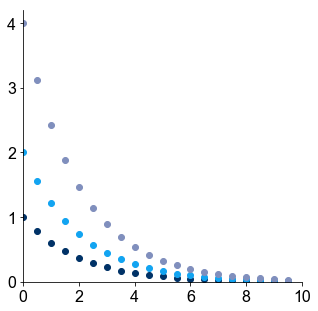

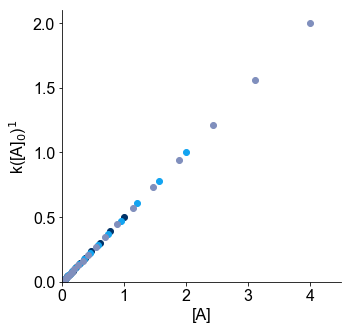

In [1024]:
#first order
start = [1, 2, 4]
k=.5
t = np.arange(0,10,0.5)
legends = ["[A]$_0$ = 1","[A]$_0$ = 2","[A]$_0$ = 4"]
plt.figure(figsize= (5,5))
for i in range(len(start)):
    y = start[i]*np.exp(-k*t)
    plt.scatter(t, y, label = legends[i], marker='o', color = palletteA[i])    
    #plt.hlines(0.5*start[i], -1, np.log(start[i]/(0.5*start[i]))/k, linestyle = '--', color='#b2b2b2')
    #plt.vlines(np.log(start[i]/(0.5*start[i]))/k, -.1, 0.5*start[i], linestyle = '--', color='#b2b2b2')
plt.ylim(0,4.2) 
plt.xlim(0, 10)
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
#plt.legend()
#plt.ylabel('concentration (unit)')
#plt.xlabel('time (unit)')
#plt.title('First Order Reaction: Rate = k[A]$^1$')
plt.savefig("secondO.png", dpi=100)
plt.show()
plt.figure(figsize= (5,5))

for i in range(len(start)):
    y = start[i]*np.exp(-k*t)
    rate = y*k
    plt.scatter(y, rate, label = legends[i], marker='o', color = palletteA[i])    
plt.ylim(0,2.1) 
plt.ylabel("k([A]$_0$)$^1$")
plt.xlabel('[A]')
plt.xlim(0, 4.5)
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
plt.savefig('tradPlot1.png', dpi = 200)
plt.show()

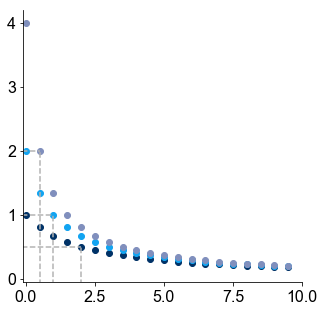

In [995]:
#second order rxn NO2->NO + O2
start = [1, 2, 4]
k=.5
t = np.arange(0,10,0.5)
legends = ["[A]$_0$ = 1","[A]$_0$ = 2","[A]$_0$ = 4"]
plt.figure(figsize= (5,5))
for i in range(len(start)):
    y = ((start[i]**-1 + (k)*t))**-1
    plt.scatter(t, y, label = legends[i], marker='o', color = palletteA[i])
    plt.hlines(0.5*start[i], -1, (-start[i]**-1+(0.5*start[i])**-1)/k, linestyle = '--', color='#b2b2b2')
    plt.vlines((-start[i]**-1+(0.5*start[i])**-1)/k, -.1, 0.5*start[i], linestyle = '--', color='#b2b2b2')
plt.ylim(-.05,4.2) 
plt.xlim(-.1, 10)
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
#plt.legend()
#plt.ylabel('concentration (unit)')
#plt.xlabel('time (unit)')
#plt.title('Second Order Reaction Rate = k[A]$^2$')
plt.savefig("thirdO.png", dpi=100)
plt.show()

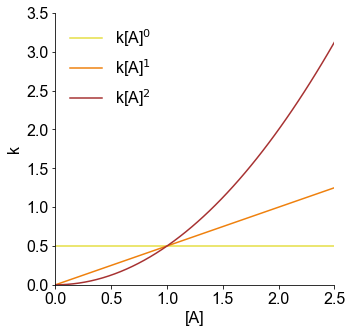

In [1022]:
#rate vs concentration
k = .5
conc = np.linspace(0,2.6)
plt.figure(figsize= (5,5))
plt.plot(conc, k * conc**0, label="k[A]$^0$", color = palletteB[0])
plt.plot(conc,k * conc**1, label="k[A]$^1$", color = palletteB[1])
plt.plot(conc,k * conc**2, label="k[A]$^2$", color = palletteB[2])
#plt.title("k vs [A]")
plt.xlabel('[A]')
plt.ylabel('k')
frame1 = plt.gca()
plt.ylim(0,3.5) 
plt.xlim(0, 2.5)
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
plt.legend(frameon=False)
plt.savefig("kvsA.png", dpi=100)
plt.show()

In [1128]:
#NO2 reaction
np.random.seed(0)

o = 1
noise = 0.01
k = 0.25
time = np.linspace(0, 15, 150)
dts = time[1:] - time[:-1]
NO2 = [1.0]
O2 = [0.]
NO = [0.]

# simulate the reaction
for i, dt in enumerate(dts):
    # calculate the rate
    rate = k*NO2[i]**o
   
    # calculate the amount of each species
    NO2.append(NO2[i] - dt * 2 * rate)
    O2.append(O2[i] + dt * rate)
    NO.append(NO[i] + dt * 1 * rate)

O2, N2O5, NO = np.array(O2), np.array(NO2), np.array(NO)

# Add noise
O2 += np.random.normal(0,noise,len(time))
NO2 += np.random.normal(0,noise,len(time))
NO += np.random.normal(0,noise,len(time))

/Users/sofiadonnecke/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


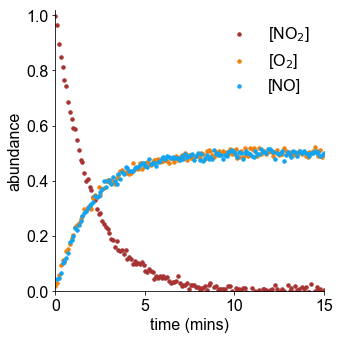

In [1129]:
legends = ["[NO$_2$]", "[NO]","[O$_2$]"]
plt.figure(figsize= (5,5))
#plt.title(r'2NO$_2$$\rightarrow$NO+O$_2$')
plt.ylabel('abundance')
plt.xlabel('time (mins)')
plt.scatter(time,NO2, s = 12, color = palletteB[2], label = legends[0])
plt.scatter(time,O2, s = 12, color = palletteB[1], label = legends[2])
plt.scatter(time,NO, s = 12, color = palletteA[1], label = legends[1])
plt.legend(frameon=False)
plt.ylim(0,1.02) 
plt.xlim(0, 15)
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
plt.savefig("second_order.png", dpi=200)
plt.show()

In [1130]:
#loop to test many initial concnentrations
np.random.seed(0)

o = 2
noise = 0.01
k = 0.05
time = np.linspace(0, 15, 150)
dts = time[1:] - time[:-1]
bNO2init = [1.0, 2.0, 4.0]
NO = {idx: [0.] for idx in range(len(bNO2init))}
NO2 = {idx: [init] for (idx, init) in enumerate(bNO2init)}
for h, val in enumerate(bNO2init):   
# simulate the reaction
    for i, dt in enumerate(dts):
        # calculate the rate
        rate = k*NO2[h][i]**o

        # calculate the amount of each species
        NO2[h].append(NO2[h][i] - dt * 2 * rate)
        NO[h].append(NO[h][i] + dt * 1 * rate)
    NO2[h], NO[h] = np.array(NO2[h]), np.array(NO[h])
    # Add noise
    NO2[h] += np.random.normal(0,noise,len(time))
    NO[h] += np.random.normal(0,noise,len(time))

/Users/sofiadonnecke/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


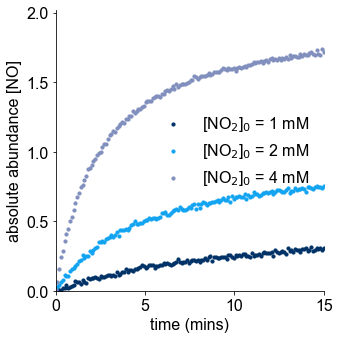

In [1133]:
#second order rxn NO2->NO + O2
legends = ["[NO$_2$]$_0$ = 1 mM","[NO$_2$]$_0$ = 2 mM","[NO$_2$]$_0$ = 4 mM"]
plt.figure(figsize= (5,5))
for i, _ in enumerate(bNO2init):
    plt.scatter(time, NO[i], s=10, label = legends[i], color = palletteA[i])
plt.legend(loc = 'center right',frameon=False)
plt.ylabel('absolute abundance [NO]')
plt.xlabel('time (mins)')
plt.ylim(0,2.02) 
plt.xlim(0, 15)
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
#plt.xlabel('time (unit)')
#plt.title(r'2NO$_2$$\rightarrow$NO+O$_2$')
plt.savefig("second_order_NO.png", dpi=200)
plt.show()

In [1050]:
def time_norm(time, conc, order):
    dt = time[1:] - time[:-1]
    ave_conc = (conc[1:] + conc[:-1]) / 2
    # check if conc, order are iterables
    # if so, the integrand should have the product of the conc^order for each reagent
    if type(order) == np.ndarray and conc.shape[1] == len(order):
        integrand = dt
        for i, o in enumerate(order):
            integrand = integrand * ave_conc[:, i]**o
    else:
        integrand = ((ave_conc)**order)*dt
    return np.concatenate((np.array([0]), np.cumsum(integrand, dtype=float)))

0.0 [0.01066291]
31.310635961636002 [1.6069446]
[0.05098209]


/Users/sofiadonnecke/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


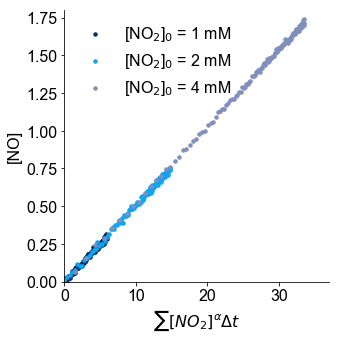

In [1080]:
#second order rxn NO2->NO + O2
legends = ["[NO$_2$]$_0$ = 1 mM","[NO$_2$]$_0$ = 2 mM","[NO$_2$]$_0$ = 4 mM"]
plt.figure(figsize= (5,5))
order = 2
for i, _ in enumerate(bNO2init):
    norm = time_norm(time, NO2[i], order)
    plt.scatter(norm, NO[i], s=12, label = legends[i], color = palletteA[i])

#line = LinearRegression().fit(norm.reshape(-1,1),NO[i].reshape(-1,1)).predict(norm.reshape(-1,1))
#plt.plot(norm,line,'--', linewidth=2, color = "#ef810e")

plt.ylim(0,1.801) 
plt.xlim(0, 37)
print(norm[0], line[0])
print(norm[100], line[100])
slop = (line[100]-line[0])/(norm[100]-norm[0])
print(slop)
plt.legend(loc = 'upper left',frameon=False)
plt.ylabel('[NO]')
plt.xlabel(r'$\sum[NO_{2}]^{\alpha}\Delta t$')
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
#plt.xlabel('time (unit)')
#plt.title(r'2NO$_2$$\rightarrow$NO+O$_2$')
plt.savefig("vtna_trendline.png", dpi=200)
plt.show()

In [1135]:
#### Poisoned
np.random.seed(0)

o = 2
noise = 0.01
k = 0.05
time = np.linspace(0, 15, 150)
dts = time[1:] - time[:-1]
bNO2init = [1.0, 2.0, 4.0]
NO = {idx: [0.] for idx in range(len(bNO2init))}
NO2 = {idx: [init] for (idx, init) in enumerate(bNO2init)}
for h, val in enumerate(bNO2init):   
# simulate the reaction
    for i, dt in enumerate(dts):
        # calculate the rate
        rate = k*(NO2[h][i]-0.15)**o

        # calculate the amount of each species
        NO2[h].append(NO2[h][i] - dt * 2 * rate)
        NO[h].append(NO[h][i] + dt * 1 * rate)
    NO2[h], NO[h] = np.array(NO2[h]), np.array(NO[h])
    # Add noise
    NO2[h] += np.random.normal(0,noise,len(time))
    NO[h] += np.random.normal(0,noise,len(time))

/Users/sofiadonnecke/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


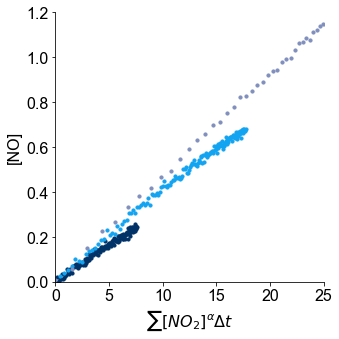

In [1136]:
#second order rxn NO2->NO + O2
legends = ["[NO$_2$]$_0$ = 1","[NO$_2$]$_0$ = 2","[NO$_2$]$_0$ = 4"]
plt.figure(figsize= (5,5))
plt.tight_layout()
order = 2
for i, _ in enumerate(bNO2init):
    norm = time_norm(time, NO2[i], order)
    plt.scatter(norm, NO[i], s=10, label = legends[i], color = palletteA[i])
plt.ylim(-.0,1.201) 
plt.xlim(-.0, 25)
#plt.legend()
plt.ylabel('[NO]')
plt.xlabel(r'$\sum[NO_{2}]^{\alpha}\Delta t$')
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
#plt.xlabel('time (unit)')
#plt.title(r'2NO$_2$$\rightarrow$NO+O$_2$')
plt.savefig("poisoned.png", dpi=200)
plt.show()

/Users/sofiadonnecke/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


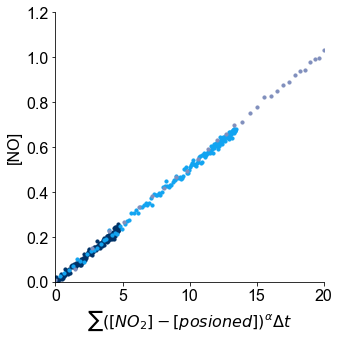

In [1137]:
#second order rxn NO2->NO + O2
legends = ["[NO$_2$]$_0$ = 1","[NO$_2$]$_0$ = 2","[NO$_2$]$_0$ = 4"]
plt.figure(figsize= (5,5))
plt.tight_layout()
order = 2
for i, _ in enumerate(bNO2init):
    norm = time_norm(time, NO2[i]-0.15, order)
    plt.scatter(norm, NO[i], s=10, label = legends[i], color = palletteA[i])
plt.ylim(0,1.201) 
plt.xlim(0, 20)
#plt.legend()
plt.ylabel('[NO]')
plt.xlabel(r'$\sum([NO_{2}]-[posioned])^{\alpha}\Delta t$')
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
#plt.xlabel('time (unit)')
#plt.title(r'2NO$_2$$\rightarrow$NO+O$_2$')
plt.savefig("poisoned_p15.png", dpi=200)
plt.show()

/Users/sofiadonnecke/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


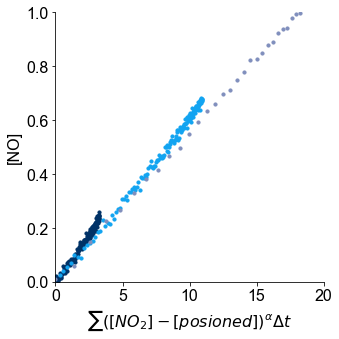

In [1084]:
#second order rxn NO2->NO + O2
legends = ["[NO$_2$]$_0$ = 1","[NO$_2$]$_0$ = 2","[NO$_2$]$_0$ = 4"]
plt.figure(figsize= (5,5))
plt.tight_layout()

order = 2
for i, _ in enumerate(bNO2init):
    norm = time_norm(time, NO2[i]-0.25, order)
    plt.scatter(norm, NO[i], s=10, label = legends[i], color = palletteA[i])
plt.ylim(0,1.001) 
plt.xlim(0, 20)
#plt.legend()
plt.ylabel('[NO]')
plt.xlabel(r'$\sum([NO_{2}]-[posioned])^{\alpha}\Delta t$')
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
#plt.xlabel('time (unit)')
#plt.title(r'2NO$_2$$\rightarrow$NO+O$_2$')
plt.savefig("poisoned_toocorrected.png", dpi=200)
plt.show()

In [1103]:
#many experiments
np.random.seed(0)

o = 2
noise = 0.01
k = 0.05
time = np.linspace(0, 15, 150)
dts = time[1:] - time[:-1]
bNO2init = [0.5, 1.0, 2.0, 4.0, 6.0]
NO = {idx: [0.] for idx in range(len(bNO2init))}
NO2 = {idx: [init] for (idx, init) in enumerate(bNO2init)}
for h, val in enumerate(bNO2init):   
# simulate the reaction
    for i, dt in enumerate(dts):
        # calculate the rate
        rate = k*NO2[h][i]**o

        # calculate the amount of each species
        NO2[h].append(NO2[h][i] - dt * 2 * rate)
        NO[h].append(NO[h][i] + dt * 1 * rate)
    NO2[h], NO[h] = np.array(NO2[h]), np.array(NO[h])
    # Add noise
    NO2[h] += np.random.normal(0,noise,len(time))
    NO[h] += np.random.normal(0,noise,len(time))

<Figure size 360x360 with 0 Axes>

/Users/sofiadonnecke/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


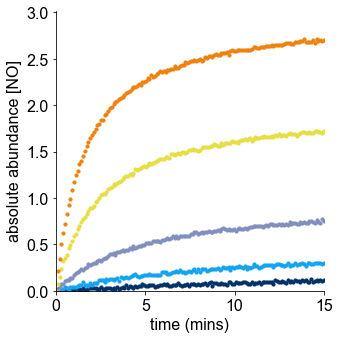

In [1104]:
#second order rxn NO2->NO + O2, traditional analysis
legends = ["[cat] = 0.5 mM","[cat] = 1 mM","[cat] = 2 mM","[cat] = 4 mM", "[cat] = 6 mM"]
plt.figure(figsize= (5,5))
for i, _ in enumerate(bNO2init):
    plt.scatter(time, NO[i], s=10, label = legends[i], color = palletteC[i])
#plt.legend()
plt.ylabel('absolute abundance [NO]')
plt.xlabel('time (mins)')
plt.ylim(0,3.02) 
plt.xlim(-0.03, 15)
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
#plt.xlabel('time (unit)')
#plt.title(r'2NO$_2$$\rightarrow$NO+O$_2$')
plt.savefig("trad_5reagents.png", dpi=200)
plt.show()

y=2.175828x+(-3.105370)


/Users/sofiadonnecke/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


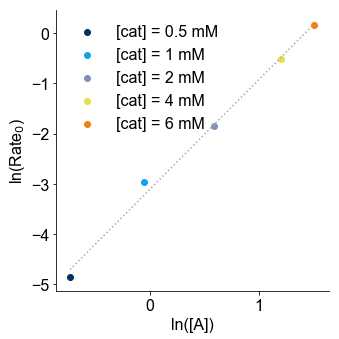

In [1105]:
#second order rxn NO2->NO + O2, traditional analysis
legends = ["[cat] = 0.5 mM","[cat] = 1 mM","[cat] = 2 mM","[cat] = 4 mM", "[cat] = 6 mM"]
plt.figure(figsize= (5,5))
rateinit = []
lnrate = []
lnconc = []
for i, _ in enumerate(bNO2init):
    rateinit.append(([NO[i][10]-NO[i][0]])/(time[10]-time[0]))
    #plt.scatter([NO2[i][5]], rateinit[i], label = legends[i], color = palletteC[i])
    plt.scatter(np.log(NO2[i][5]), np.log(rateinit[i]), label = legends[i], color = palletteC[i])
    lnrate.append(np.log(rateinit[i][0]))
    lnconc.append(np.log(NO2[i][5]))
z = np.polyfit(lnconc, lnrate, 1)
p = np.poly1d(z)
plt.plot(lnconc,p(lnconc),':', color = "#aaaaaa")
plt.ylabel('ln(Rate$_0$)')
plt.xlabel('ln([A])')
#plt.ylim(0,2.02) 
#plt.xlim(0, .35)
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.legend(loc = 'upper left',frameon=False)

#plt.xlabel('time (unit)')
#plt.title(r'2NO$_2$$\rightarrow$NO+O$_2$')
plt.savefig("2ndOrdertrad_rateconc.png", dpi=200)
plt.show()


/Users/sofiadonnecke/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


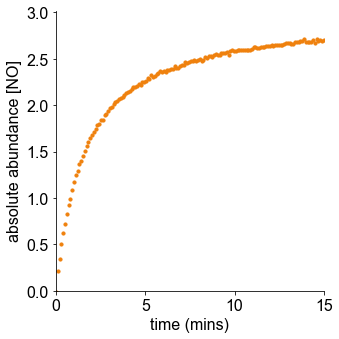

In [1108]:
#second order rxn NO2->NO + O2
legends = ["[cat] = 0.5 mM","[cat] = 1 mM","[cat] = 2 mM","[cat] = 4 mM", "[cat] = 6 mM"]
plt.figure(figsize= (5,5))
#for i, _ in enumerate(bNO2init):
#    plt.scatter(time, NO[i], s=10, label = legends[i], color = palletteA[2-i])
#plt.legend()
plt.scatter(time, NO[4], s=10, label = legends[4], color = palletteC[4])
plt.ylabel('absolute abundance [NO]')
plt.xlabel('time (mins)')
plt.ylim(0,3.02) 
plt.xlim(-0.03, 15)
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
#plt.xlabel('time (unit)')
#plt.title(r'2NO$_2$$\rightarrow$NO+O$_2$')
plt.savefig("second_order_NO2mM.png", dpi=200)
plt.show()

0.0 [0.02979153]
49.829747258496084 [2.58235677]
[0.05122573]


/Users/sofiadonnecke/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


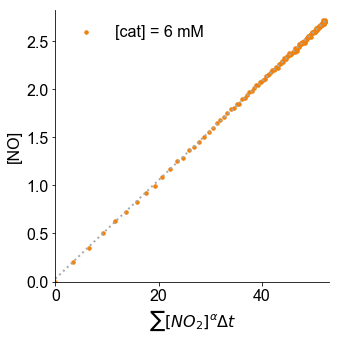

In [1124]:
#second order rxn NO2->NO + O2
plt.figure(figsize= (5,5))
order = 2
#for i, _ in enumerate(bNO2init):
#    norm = time_norm(time, NO2[i], order)
#    plt.scatter(norm, NO[i], s=12, label = legends[i], color = palletteA[2-i])
norm = time_norm(time, NO2[4], order)
plt.scatter(norm, NO[4], s=12, label = legends[4], color = palletteC[4])
line = LinearRegression().fit(norm.reshape(-1,1),NO[4].reshape(-1,1)).predict(norm.reshape(-1,1))
plt.plot(norm,line, linewidth=2, linestyle = ':', color = "#aaaaaa")
plt.ylim(0,2.82) 
plt.xlim(0, 53)
print(norm[0], line[0])
print(norm[100], line[100])
slop = (line[100]-line[0])/(norm[100]-norm[0])
print(slop)
plt.legend(loc = 'upper left',frameon=False)
plt.ylabel('[NO]')
plt.xlabel(r'$\sum[NO_{2}]^{\alpha}\Delta t$')
frame1 = plt.gca()
frame1.spines['top'].set_visible(False)
frame1.spines['right'].set_visible(False)
#plt.xlabel('time (unit)')
#plt.title(r'2NO$_2$$\rightarrow$NO+O$_2$')
plt.savefig("vtna_trendline.png", dpi=200)
plt.show()